In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_hscore=pd.read_excel('DataPanelWHR2021C2.xls')

In [3]:
data_hscore.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [4]:
data_hscore.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [5]:
#dropping positive and negative aafect, cause thye're subjective terms, and not actually used to calculate any index

In [6]:
data_hscore=data_hscore.drop(['Positive affect','Negative affect'],axis=1)

In [7]:
#keeping only information about the years 2005,2010,2015,2016 beacuse they're values extracted from reliable sources (WHO) and the other's are computed.

In [8]:
data_hscore=data_hscore[(data_hscore['year']==2005)|(data_hscore['year']==2010)|(data_hscore['year']==2015)|(data_hscore['year']==2016)]

In [9]:
data_hscore.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766
7,Afghanistan,2015,3.982855,7.701992,0.528597,53.200001,0.388928,0.079864,0.880638
8,Afghanistan,2016,4.220169,7.696560,0.559072,53.000000,0.522566,0.042265,0.793246
14,Albania,2010,5.268937,9.303230,0.733152,66.400002,0.568958,-0.172107,0.726262
19,Albania,2015,4.606651,9.403102,0.639356,67.800003,0.703851,-0.080839,0.884793


In [10]:
data_hscore.shape

(436, 9)

In [11]:
data_hscore.isna().sum()/len(data_hscore)

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.016055
Social support                      0.011468
Healthy life expectancy at birth    0.027523
Freedom to make life choices        0.020642
Generosity                          0.080275
Perceptions of corruption           0.064220
dtype: float64

In [12]:
data_hscore.describe().T

,count,mean,std,min,25%,50%,75%,max
year,436.0,2013.284404,3.272573,2005.000000,2010.000000,2015.000000,2016.000000,2016.000000
Life Ladder,436.0,5.493444,1.139714,2.693061,4.621590,5.460433,6.362820,8.018934
Log GDP per capita,429.0,9.443266,1.147558,6.785016,8.503568,9.561364,10.461033,11.640030
Social support,431.0,0.818310,0.119804,0.290184,0.760454,0.847095,0.911562,0.987343
Healthy life expectancy at birth,424.0,63.770807,7.318212,32.299999,59.275000,65.500000,68.800003,76.199997
Freedom to make life choices,427.0,0.746623,0.137099,0.303540,0.656119,0.771722,0.849874,0.983803
Generosity,401.0,0.008733,0.160866,-0.302877,-0.096824,-0.028660,0.095851,0.687560
Perceptions of corruption,408.0,0.744549,0.190793,0.047311,0.691939,0.809261,0.868467,0.983276


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Life Ladder'}>,
        <AxesSubplot:title={'center':'Log GDP per capita'}>],
       [<AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy at birth'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>],
       [<AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:>]], dtype=object)

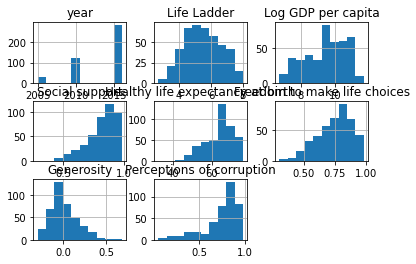

In [13]:
data_hscore.hist()

In [14]:
#plotted the columns to decide what to do with NaN values, and decided, since there's not a lot of them, and seeing the distribution of values, to fill them with the calculated mean

In [15]:
data_hscore['Log GDP per capita']=data_hscore['Log GDP per capita'].fillna(np.mean(data_hscore['Log GDP per capita']))
data_hscore['Social support']=data_hscore['Social support'].fillna(np.mean(data_hscore['Social support']))
data_hscore['Healthy life expectancy at birth']=data_hscore['Healthy life expectancy at birth'].fillna(np.mean(data_hscore['Healthy life expectancy at birth']))
data_hscore['Freedom to make life choices']=data_hscore['Freedom to make life choices'].fillna(np.mean(data_hscore['Freedom to make life choices']))
data_hscore['Generosity']=data_hscore['Generosity'].fillna(np.mean(data_hscore['Generosity']))
data_hscore['Perceptions of corruption']=data_hscore['Perceptions of corruption'].fillna(np.mean(data_hscore['Perceptions of corruption']))

In [16]:
data_hscore.isna().sum()/len(data_hscore)

Country name                        0.0
year                                0.0
Life Ladder                         0.0
Log GDP per capita                  0.0
Social support                      0.0
Healthy life expectancy at birth    0.0
Freedom to make life choices        0.0
Generosity                          0.0
Perceptions of corruption           0.0
dtype: float64

In [17]:
for i in data_hscore['Country name'].value_counts():
    print (i)


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1


In [18]:
data_hscore['Country name'].value_counts().tail(10)

Norway               2
Algeria              2
Somaliland region    1
Sudan                1
Bhutan               1
Mauritius            1
Comoros              1
Djibouti             1
Lesotho              1
Mozambique           1
Name: Country name, dtype: int64

In [19]:
data_hscore['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo',
       'Kuwait', 'Kyrgyzstan', 'Latvia'

In [20]:
len(data_hscore['Country name'].unique())

152

In [21]:
#created a data frame with only the variable values, to see the correlation between that and the happy score (life ladder)

In [22]:
data_hscore_values=data_hscore.drop(['year','Country name'],axis=1)

In [23]:
corr_matrix=data_hscore_values.corr()

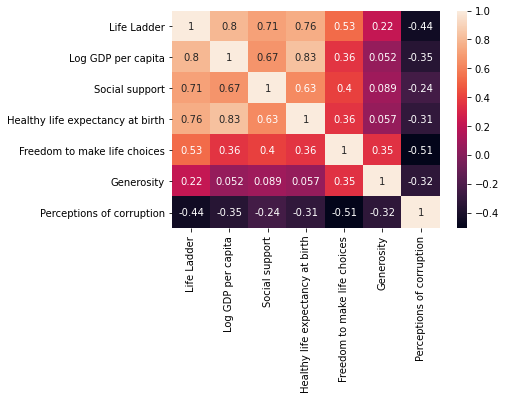

In [24]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [25]:
data_hscore_values.shape

(436, 7)

In [26]:
#from this correlation plot, we can see that GDP is really highly relted to overall mind state of the country, this si absolutly obvious, since it leads to better sanitation, education,and overall life commodity.
# i wanted to look deeply in the healthy life expectancy at birth, bringing from another dataset more information about overall health, to see what variables affect the most to this emocional state

In [27]:
#CREATE MODEL 

In [28]:
#X-Y SPLIT

In [29]:
X=data_hscore_values.drop(['Life Ladder'],axis=1)
y=data_hscore_values['Life Ladder']

In [30]:
#TRAIN TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
#TRANSFORMATIONS

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [35]:
transformer1 = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer1.transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(transformer1.transform(X_test),columns=X_test.columns)

transformer2 = MinMaxScaler().fit(X_train)
X_train_normalized = pd.DataFrame(transformer2.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(transformer2.transform(X_test), columns=X_test.columns)

In [36]:
X_train_normalized.shape

(348, 6)

In [37]:
X_test_normalized.shape

(88, 6)

array([[<AxesSubplot:title={'center':'Log GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>],
       [<AxesSubplot:title={'center':'Healthy life expectancy at birth'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>],
       [<AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>]],
      dtype=object)

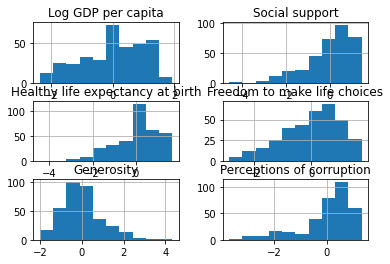

In [38]:
X_train_scaled.hist()

array([[<AxesSubplot:title={'center':'Log GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>],
       [<AxesSubplot:title={'center':'Healthy life expectancy at birth'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>],
       [<AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>]],
      dtype=object)

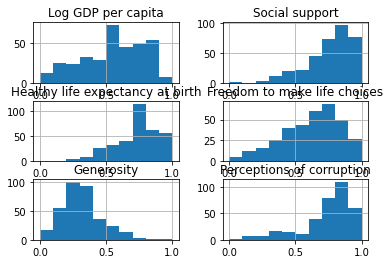

In [39]:
X_train_normalized.hist()

In [40]:
#LINEAR REGRESSION MODEL

In [41]:
from sklearn import linear_model

In [42]:
X_train_scaled.shape

(348, 6)

In [43]:
X_test_scaled.shape

(88, 6)

In [44]:
LR_scaled = linear_model.LinearRegression()
LR_scaled.fit(X_train_scaled, y_train)
LR_scaled.score(X_test_scaled, y_test)

0.7384241011336075

In [51]:
LR_normalized = linear_model.LinearRegression()
model=LR_normalized.fit(X_train_normalized, y_train)
LR_normalized.score(X_test_normalized, y_test)
predictions=model.predict(X_test_normalized)

In [46]:
LR_scaled.coef_

array([ 0.42625872,  0.25233975,  0.23678567,  0.16046803,  0.08470888,
       -0.1259314 ])

In [47]:
LR_normalized.coef_

array([ 1.83374571,  1.51658874,  1.44102142,  0.74058561,  0.53682763,
       -0.63278538])

In [48]:
data_hscore_use=data_hscore[(data_hscore['year']==2015)]

In [49]:
data_hscore_use.to_csv('HSCORE.csv')

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
mean_squared_error(y_test, predictions)

0.3664942450599508